In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy.integrate import odeint

#plt.style.use('ggplot')

In [2]:
def fitness(V, c, k, f0): 
    return f0 * V*(1 - k*c)

def fitneses(k,f0):
    '''takes inputs of k and f0 and returns 
    fh, fc, fs, fb respectively'''
    return fitness(1,1,k,f0), fitness(1,0,k,f0), fitness(0,1,k,f0), fitness(0,0,k,f0)

tmax = 10000 
steps = 1000
t = np.linspace(0, tmax, steps)

def dNb(y, t, fh, fc, fs, fb, mu_c, mu_v):
    nb = y
    dndt = fb*nb + mu_v*(mu_c/(fc-fh+mu_c))*(np.exp((fc-mu_v)*t) - np.exp((fh-mu_v-mu_c)*t)) + -1*(mu_c * mu_v/(fs - fh+mu_v)) * (np.exp((fh- mu_v - mu_c)*t) - np.exp((fs-mu_c)*t))
    return dndt

def Nb( t, fh, fc, fs, fb, mu_c, mu_v):
    y0 = 0 
    sol = odeint(dNb, y0, t, args = (fh, fc, fs, fb, mu_c, mu_v))
    return sol
    
def populations(fh, fc, fs, fb, mu_c, mu_v,t):
    '''takes inputs of all the different parameters for the population 
    and outputs each population and the total population'''
    NhArr = np.exp((fh - mu_v - mu_c) * t)
    NsArr = -1*(mu_v/(fs - fh+mu_v)) * (np.exp((fh- mu_v - mu_c)*t) - np.exp((fs-mu_c)*t))
    NcArr = (mu_c/(fc-fh+mu_c)) * (np.exp((fc-mu_v)*t) - np.exp((fh-mu_v-mu_c)*t))
    NbArr =  Nb( t, fh, fc, fs, fb, mu_c, mu_v).reshape(len(t))
    total = NhArr + NsArr + NcArr + NbArr
    return NhArr, NsArr, NcArr, NbArr, total

def r(k, f0, bh, bc, bs, bb):
    '''for a given k and f0 it uses the different removal rates (bh, bc, bs, bb) to give r for each type of cell'''
    rh = fitness(1,1,k,f0) - bh
    rc = fitness(1,0,k,f0) - bc
    rs = fitness(0,1,k,f0) - bs
    rb = fitness(0,0,k,f0) - bb
    return rh, rc, rs, rb

def popWithRemoval(k, f0, mu_c, mu_v, bh, bc, bs, bb):
    '''given the input parameters returns the populations of each cell over a given time'''
    rh, rc, rs, rb =  r(k, f0, bh, bc, bs, bb)
    NhArr, NsArr, NcArr, NbArr, total = populations(rh, rc, rs, rb, mu_c, mu_v,t)
    return NhArr, NsArr, NcArr, NbArr, total 

def popArrays(k,f0,mu_c,mu_v):
    #gets the populations and total given the inputed parameters
    fh, fc, fs, fb = fitneses(k,f0)
    NhArr, NsArr, NcArr, NbArr, total = populations(fh, fc, fs, fb, mu_c, mu_v,t)
    return NhArr, NsArr, NcArr, NbArr, total    



In [3]:
tmax = 10000
steps = 1000
t = np.linspace(0, tmax, steps)

#initial conditions
k,f0,mu_c,mu_v, bh, bc, bs, bb = 0.5,0.004,1e-5,1e-3,0,0,0,0
NhArr, NsArr, NcArr, NbArr, total = popWithRemoval(k, f0, mu_c, mu_v, bh, bc, bs, bb)



0

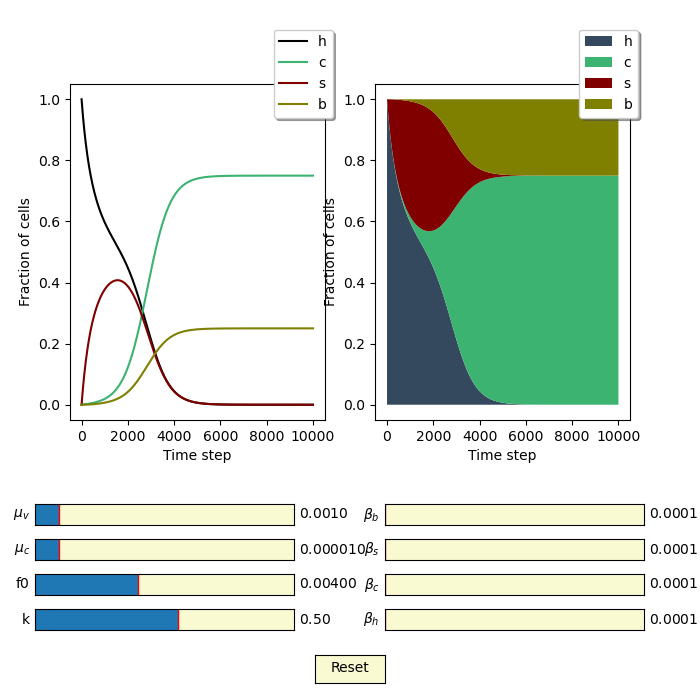

In [4]:
#plotting initial values
fig, ax = plt.subplots(1,2,figsize = (7,7))
plt.subplots_adjust(left=0.1, bottom=0.4)


#lineplot
ax[0].plot(t, NhArr/total, color = 'k', linestyle = (0, (5, 5)), linewidth = 0.5)
ax[0].plot(t, NcArr/total, color = '#3BB170', linestyle = (0, (5, 5)), linewidth = 0.5)
ax[0].plot(t, NsArr/total, color = 'maroon', linestyle = (0, (5, 5)), linewidth = 0.5)
ax[0].plot(t, NbArr/total, color = 'olive', linestyle = (0, (5, 5)), linewidth = 0.5)

a, = ax[0].plot(t, NhArr/total, color = 'k', label = 'h')
b, = ax[0].plot(t, NcArr/total, color = 'mediumseagreen', label = 'c')
c, = ax[0].plot(t, NsArr/total, color = 'maroon', label = 's')
d, = ax[0].plot(t, NbArr/total, color = 'olive', label = 'b')


#stackplot
ax[1].fill_between(t,0,NhArr/total, facecolor = "#34495e", label = 'h')
ax[1].fill_between(t,NhArr/total, NcArr/total+NhArr/total, facecolor = 'mediumseagreen', label = 'c')
ax[1].fill_between(t,NcArr/total+NhArr/total, NsArr/total+NcArr/total+NhArr/total, facecolor = 'maroon', label = 's')
ax[1].fill_between(t,NsArr/total+NcArr/total+NhArr/total, 1, facecolor = 'olive', label = 'b')

for i in range(2):
    ax[i].set_xlabel('Time step')
    ax[i].set_ylabel('Fraction of cells')
    ax[i].legend(loc = (0.8,0.9), shadow = True)


# settings for the sliders 
axcolor = 'lightgoldenrodyellow'
axk = plt.axes([0.05, 0.1, 0.37, 0.03], facecolor=axcolor)
axf0 = plt.axes([0.05, 0.15, 0.37, 0.03], facecolor=axcolor)
axc = plt.axes([0.05, 0.2, 0.37, 0.03], facecolor=axcolor)
axv = plt.axes([0.05, 0.25, 0.37, 0.03], facecolor=axcolor)
axbh = plt.axes([0.55, 0.1, 0.37, 0.03], facecolor=axcolor) 
axbc = plt.axes([0.55, 0.15, 0.37, 0.03], facecolor=axcolor)
axbs = plt.axes([0.55, 0.2, 0.37, 0.03], facecolor=axcolor)
axbb = plt.axes([0.55, 0.25, 0.37, 0.03], facecolor=axcolor)

sk = Slider(ax=axk, label = 'k', valmin=0.01, valmax=0.9, valinit=k)
sf0 = Slider(ax=axf0, label = 'f0', valmin=0.00001, valmax=0.01, valinit=f0)
sc = Slider(ax=axc, label = r'$\mu_c$', valmin=1e-6, valmax=1e-4, valinit=mu_c)
sv = Slider(ax=axv, label = r'$\mu_v$', valmin=0.0001, valmax=0.01, valinit=mu_v)
sbh = Slider(ax=axbh, label = r'$\beta_h$', valmin=0.0001, valmax=0.05, valinit=bh)
sbc = Slider(ax=axbc, label = r'$\beta_c$', valmin=0.0001, valmax=0.05, valinit=bc)
sbs = Slider(ax=axbs, label = r'$\beta_s$', valmin=0.0001, valmax=0.05, valinit=bs)
sbb = Slider(ax=axbb, label = r'$\beta_b$', valmin=0.0001, valmax=0.05, valinit=bb)

# settings for reset button
resetax = plt.axes([0.45, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

#function to update the graph when the slider is moved
def update(val):
    k = sk.val
    f0 = sf0.val
    mu_c = sc.val
    mu_v = sv.val
    bh = sbh.val
    bc = sbc.val
    bs = sbs.val
    bb = sbb.val
    
    NhArr, NsArr, NcArr, NbArr, total = popWithRemoval(k,f0,mu_c,mu_v,bh, bc, bs, bb)
    a.set_ydata(NhArr/total)
    b.set_ydata(NcArr/total)
    c.set_ydata(NsArr/total)
    d.set_ydata(NbArr/total)
    
    ax[1].collections.clear()
    ax[1].fill_between(t,0,NhArr/total, facecolor = "#34495e")
    ax[1].fill_between(t,NhArr/total, NcArr/total+NhArr/total, facecolor = 'mediumseagreen')
    ax[1].fill_between(t,NcArr/total+NhArr/total, NsArr/total+NcArr/total+NhArr/total, facecolor = 'maroon')
    ax[1].fill_between(t,NsArr/total+NcArr/total+NhArr/total, 1, facecolor = 'olive')
    
    fig.canvas.draw_idle()
sk.on_changed(update)
sf0.on_changed(update)
sc.on_changed(update)
sv.on_changed(update)
sbh.on_changed(update)
sbc.on_changed(update)
sbs.on_changed(update)
sbb.on_changed(update)


# function to reset graph to initial values by pressign reset button
def reset(event):
    sf0.reset()
    sk.reset()
    sc.reset()
    sv.reset()
    sbh.reset()
    sbc.reset()
    sbs.reset()
    sbb.reset()
button.on_clicked(reset)